In [1]:
# libraries to import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)
import seaborn as sns

In [3]:
rng = np.random.default_rng (1)
x = rng.normal(size = 100)
y = 2 * x + rng.normal(size = 100)

[ 0.34558419  0.82161814  0.33043708 -1.30315723  0.90535587]
[ 0.03988737  2.50568108  0.53528207 -1.93716122  3.02955534]


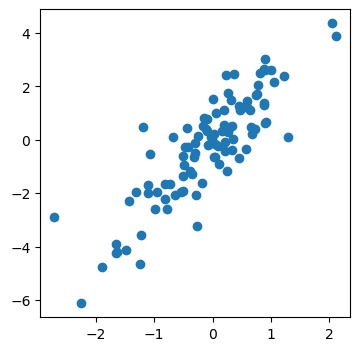

In [8]:
ax = plt.subplots(figsize = (4,4))
plt.scatter(x,y);

In [19]:
X_df = pd.DataFrame({'x':x})
Y_df = pd.DataFrame({'y':y})

model = MS(X_df, intercept = False).fit_transform(X_df)
result = sm.OLS(Y_df, X_df).fit()

# better approach
# df = pd.DataFrame({'x': x, 'y':y})
# X = MS('x', intercept=False).fit_transform(df)
# results = sm.OLS(y, X).fit()
# summarize(results)

In [20]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Tue, 03 Feb 2026   Prob (F-statistic):                    6.23e-31
Time:                        16:19:14   Log-Likelihood:                         -141.35
No. Observations:                 100   AIC:                                      284.7
Df Residuals:                      99   BIC:                                      287.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              1.9762      0.117     16.898      0.000       1.744       2.208
==============================================================================
Omnibus:                        1.376   Durbin-Watson:                   2.184
Prob(Omnibus):                  0.503   Jarque-Bera (JB):                0.847
Skew:                           0.121   Prob(JB):                        0.655
Kurtosis:                       3.381   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
"""
coefficient of determination : R square is 74.3%. model is considerably good without having an intercept
t statistic and p value of the coefficient are stat significant
hence we can reject the hypothesis that the coefficient is zero
"""

In [22]:
df = pd.DataFrame({'x': x, 'y':y})
Y = MS('y', intercept=False).fit_transform(df)
results2 = sm.OLS(x, Y).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Tue, 03 Feb 2026   Prob (F-statistic):                    6.23e-31
Time:                        16:28:12   Log-Likelihood:                         -58.349
No. Observations:                 100   AIC:                                      118.7
Df Residuals:                      99   BIC:                                      121.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
y              0.3757      0.022     16.898      0.000       0.332       0.420
==============================================================================
Omnibus:                       13.156   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.596
Skew:                          -0.528   Prob(JB):                     1.24e-05
Kurtosis:                       5.075   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
"""
same observation as the model before
coeff is stat significant

the t statistic of both are exactly the same

Detailed explanation in :
https://botlnec.github.io/islp/sols/chapter3/exercise11/
"""

In [29]:
def tStat(x,y):
    n = x.shape[0]
    numerator = np.sqrt(n-1) * np.sum(x*y)
    denominator = np.sqrt( np.sum(np.power(x,2)) * np.sum(np.power(y,2)) - np.power(np.sum(x*y),2))
    return numerator / denominator

In [30]:
tStat(x,y)

np.float64(16.898417063035094)

In [31]:
# fit the model with intercept

X = pd.DataFrame({'x': x})
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     280.0
Date:                Tue, 03 Feb 2026   Prob (F-statistic):           1.74e-30
Time:                        17:57:01   Log-Likelihood:                -141.06
No. Observations:                 100   AIC:                             286.1
Df Residuals:                      98   BIC:                             291.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0760      0.101     -0.756      0.451      -0.276       0.124
x              1.9686      0.118     16.734      0.000       1.735       2.202
==============================================================================
Omnibus:                        1.277   Durbin-Watson:                   2.198
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.759
Skew:                           0.114   Prob(JB):                        0.684
Kurtosis:                       3.361   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
# fit the model with intercept

Y = pd.DataFrame({'y': y})
Y = sm.add_constant(Y)

model = sm.OLS(x, Y).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     280.0
Date:                Tue, 03 Feb 2026   Prob (F-statistic):           1.74e-30
Time:                        17:57:38   Log-Likelihood:                -58.325
No. Observations:                 100   AIC:                             120.6
Df Residuals:                      98   BIC:                             125.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0095      0.044      0.216      0.829      -0.078       0.097
y              0.3763      0.022     16.734      0.000       0.332       0.421
==============================================================================
Omnibus:                       13.123   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.501
Skew:                          -0.528   Prob(JB):                     1.30e-05
Kurtosis:                       5.070   Cond. No.                         1.98
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
"""
t statistic is same for the b1 in both the above models with intercept : y~x & x~y
"""